# Fourier Transforms Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, ion, draw
import ffmpeg

(0.0, 1.0)

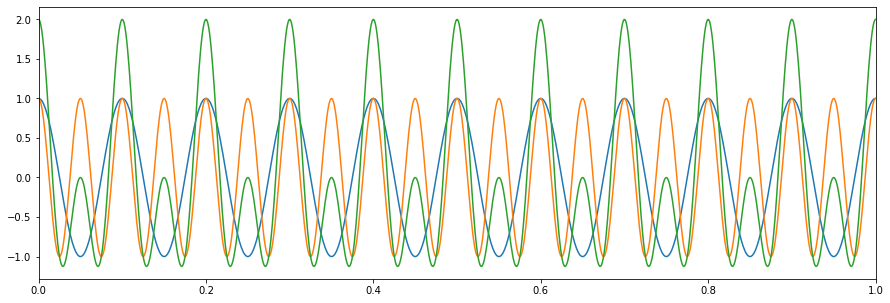

In [2]:
plt.figure(figsize = (15, 5))
res = 1000
wave1 =  np.sin(np.linspace(np.pi/2, np.pi*20 + np.pi/2, res)) # 10 hz
wave2 =  np.sin(np.linspace(np.pi/2, np.pi*40 + np.pi/2, res)) # 20 hz
plt.plot(np.linspace(0, 1, res), wave1)
plt.plot(np.linspace(0, 1, res), wave2 )
plt.plot(np.linspace(0, 1, res), (wave1+wave2) )
plt.xlim(0, 1)

In [19]:
wave1 =  np.sin(np.linspace(np.pi/2, np.pi*20 + np.pi/2, res)) + 2
wave2 =  np.sin(np.linspace(np.pi/2, np.pi*40 + np.pi/2, res)) + 2
wave3 = wave1+wave2

waves = [wave1, wave2, wave3]

In [20]:
def to_complex(mag, theta):
    return mag * np.exp(theta*1j)

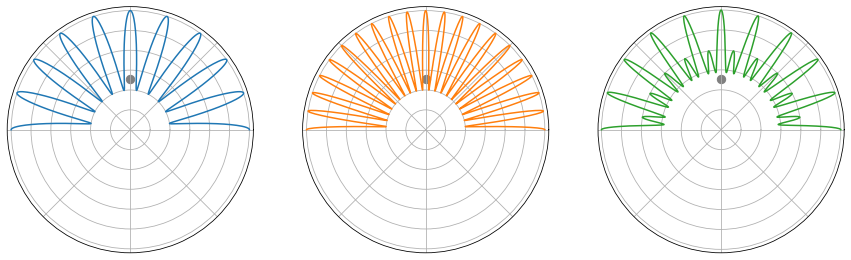

In [21]:
fig = plt.figure(figsize = (15, 5))
plots = []
f = 0.5
for i in range(3):
    plots.append(fig.add_subplot(130+i+1,projection='polar'))

    a = np.mean(to_complex(abs(waves[i]), 2*np.pi*np.linspace(0, f, res)))

    plots[i].scatter(np.angle(a), abs(a), c= "grey", s = 70)
    
    plots[i].plot(2*np.pi*np.linspace(0, f, res), waves[i], c = "C" + str(i))
    plots[i].set_yticklabels([])
    plots[i].set_xticklabels([])


In [9]:
from celluloid import Camera

STEP:  0.005025125628140704


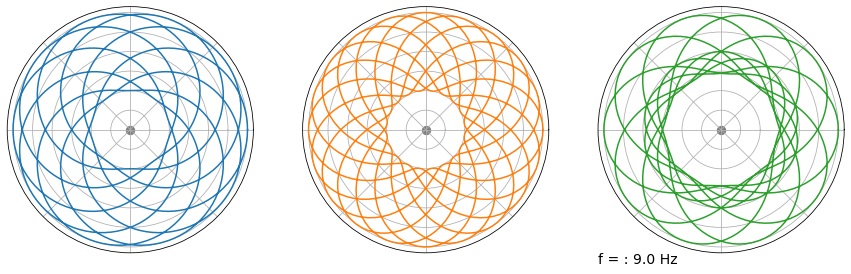

In [66]:
fig = plt.figure(figsize = (15, 7))
camera = Camera(fig)
plots = []
for i in range(3):
    plots.append(fig.add_subplot(130+i+1,projection='polar'))
    
frequencies, step = np.linspace(9, 10, 200, retstep = True)
# frequencies, step = np.linspace(0.1, 22, 2000, retstep = True)
print("STEP: ", step)

cent = []
for f in frequencies:

    for i in range(3):

        plots[i].plot(2*np.pi*np.linspace(0, f, res), waves[i], c = "C" + str(i))
        plots[i].set_yticklabels([])
        plots[i].set_xticklabels([])
        
        a = np.mean(to_complex(abs(waves[i]), 2*np.pi*np.linspace(0, f, res)))
        plots[i].scatter(np.angle(a), abs(a), c= "grey", s = 70)
        
        
    plots[0].text(0, 0, "f = : " + str(round(f,2)) + " Hz", transform= plots[i].transAxes, fontsize=14,
        verticalalignment='top')
    

    cent.append(a.real)

    plt.clf
    camera.snap()
#     plt.legend()

    plt.show()
# draw()


In [67]:
animation = camera.animate(interval = 20, repeat = True, repeat_delay = 5000)

In [69]:
animation.save('animation_8_10_centroid.gif', writer='PillowWriter', fps=30)

MovieWriter PillowWriter unavailable; using Pillow instead.


In [63]:
from IPython.display import HTML
HTML(animation.to_html5_video())

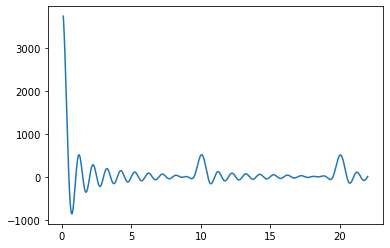

In [40]:
plt.plot(np.linspace(0.1, 22, 2000), cent)
# plt.xlim(5, 25)
# plt.ylim(-1,1)